In [1]:
import numpy as np
import random as random

In [2]:
from copy import deepcopy

In [3]:
from matplotlib import pyplot as plt

In [4]:
from scipy import stats

In [5]:
t = 100

In [6]:
V = np.zeros((t))

for i in range(t):
    V[i] = np.random.normal()

In [7]:
def markov_step(pi):#шаг цепи Маркова
    
    rand = np.random.random()
    #rand = 0.85
    next_state = 0
    
    zero = 0
        
    for j in range(len(pi)):
        
        if(j == 0):
            if(rand < pi[j]):
                next_state = j
                break;
        
        if(j != 0)and(j != len(pi) - 1):
            if rand >= zero and rand < zero + pi[j]:
                next_state = j
                break;
            #else:
            #    next_state = next_state
        if (j == len(pi) - 1):
            if rand >= zero:
                next_state = j
                break;
                
        zero += pi[j]
        
    next_state_ohe = np.zeros((len(pi)))
    next_state_ohe[next_state] = 1
                
    return next_state_ohe,next_state, rand

In [8]:
pi_test = np.zeros((3))

In [9]:
pi_test[0] = 0.1
pi_test[1] = 0.4
pi_test[2] = 0.5

In [10]:
res = markov_step(pi_test)#от 0 до 0.1, от 0.1 до 0.6, от 0.6 до 0.85, от 0.85 до 1
                          #     0            1              2              3

In [11]:
res

(array([0., 0., 1.]), 2, 0.6626590878250647)

In [12]:
def markov_chain(pi0,P,t):

    first_step = markov_step(pi0)[0]#первый шаг
    pi_next = P[np.nonzero(first_step)[0][0]]
    history = np.zeros((t,len(pi0)))
    history[0] = deepcopy(first_step)
    
    for i in range(1,t):
        step = markov_step(pi_next)[0]
        history[i] = step
        pi_next = P[np.nonzero(step)[0][0]]
    
    return history

In [13]:
P_test = np.random.random((3,3))

In [14]:
P_test[0][0] = 0.2
P_test[0][1] = 0.4
P_test[0][2] = 0.4
P_test[1][0] = 0.1
P_test[1][1] = 0.7
P_test[1][2] = 0.2
P_test[2][0] = 0.3
P_test[2][1] = 0.6
P_test[2][2] = 0.1

P_test

array([[0.2, 0.4, 0.4],
       [0.1, 0.7, 0.2],
       [0.3, 0.6, 0.1]])

In [15]:
markov_step(P_test[0])

(array([0., 1., 0.]), 1, 0.5712486740713393)

In [16]:
markov_chain(pi_test,P_test,10)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [17]:
#закончил с тестами
#теперь моделирую мою МЦ

In [18]:
P = np.zeros((4,4))

P[0][0] = 0
P[0][1] = 1
P[0][2] = 0
P[0][3] = 0
P[1][0] = np.sin(8*np.pi/5)**2
P[1][1] = 0
P[1][2] = np.cos(8*np.pi/5)**2
P[1][3] = 0
P[2][0] = 0
P[2][1] = 0
P[2][2] = 0
P[2][3] = 1
P[3][0] = np.cos(8*np.pi/10)**2
P[3][1] = 0
P[3][2] = np.sin(8*np.pi/10)**2
P[3][3] = 0

In [19]:
pi0 = np.zeros((4))

pi0[0] = 1/2*(np.sin(8*np.pi/6)**2)
pi0[1] = 1/2*(np.cos(8*np.pi/6)**2)
pi0[2] = 1/2*(np.sin(8*np.pi/12)**2)
pi0[3] = 1/2*(np.cos(8*np.pi/12)**2)

In [20]:
markov_chain(pi0,P,t)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],


In [21]:
#3.1

markov_sim = markov_chain(pi0,P,t)#моделирование
markov_triv = np.zeros((t,len(pi0)))#тривиальный прогноз

for i in range(t):
    if(i == 0):
        markov_triv[i] = deepcopy(pi0)
    if(i != 0):
        markov_triv[i] = deepcopy(P.transpose().dot(markov_sim[i-1]))
        #markov_triv[i] = P[np.argmax(P[np.nonzero(markov_sim[i-1])[0][0]])]#old

markov_sim = markov_sim.reshape(t,4)

In [22]:
pi0

array([0.375, 0.125, 0.375, 0.125])

In [23]:
P

array([[0.       , 1.       , 0.       , 0.       ],
       [0.9045085, 0.       , 0.0954915, 0.       ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ]])

In [24]:
markov_triv

array([[0.375    , 0.125    , 0.375    , 0.125    ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ],
       [0.       , 1.       , 0.       , 0.       ],
       [0.9045085, 0.       , 0.0954915, 0.       ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ],
       [0.       , 1.       , 0.       , 0.       ],
       [0.9045085, 0.       , 0.0954915, 0.       ],
       [0.       , 1.       , 0.       , 0.       ],
       [0.9045085, 0.       , 0.0954915, 0.       ],
       [0.       , 1.       , 0.       , 0.       ],
       [0.9045085, 0.       , 0.0954915, 0.   

In [25]:
markov_sim

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],


In [33]:
delta_1 = markov_triv - markov_sim #ошибки для всех t

In [34]:
delta_1[0]#ошибка для начального состояния

array([ 0.375,  0.125, -0.625,  0.125])

In [35]:
np.cov(delta_1[0],delta_1[0])#ковариация

array([[0.1875, 0.1875],
       [0.1875, 0.1875]])

In [36]:
delta_1[0]

array([ 0.375,  0.125, -0.625,  0.125])

In [37]:
np.cov(delta_1,delta_1).shape

(200, 200)

In [38]:
P

array([[0.       , 1.       , 0.       , 0.       ],
       [0.9045085, 0.       , 0.0954915, 0.       ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ]])

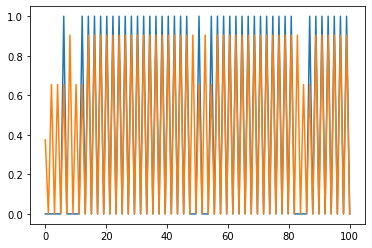

In [39]:
x = np.linspace(0,t,t)
#y = np.nonzero(markov_sim)[1]
y = markov_sim.transpose()[0]

plt.plot(x,y)

y = markov_triv.transpose()[0]
plt.plot(x,y)

In [40]:
t

100

In [41]:
len(markov_sim)

100

In [42]:
len(np.nonzero(markov_sim)[1])

100

In [43]:
markov_sim.reshape((100,4))

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],


# Альтернативный 3.1

In [115]:
a = np.zeros((4,4))
b = np.zeros((4,4))
c = np.zeros((4,4))
d = np.zeros((4,4))

a[0][0] = -1 + np.sqrt(5)/3
a[0][1] = - 1/2 + np.sqrt(5)/6
a[0][2] = 1 + np.sqrt(5)/3
a[0][3] = 1/2 + np.sqrt(5)/6
a[1][0] = -2 + 2*np.sqrt(5)/3
a[1][1] = -1 + np.sqrt(5)/3
a[1][2] = 2 + 2*np.sqrt(5)/3
a[1][3] = 1 + np.sqrt(5)/3
a[2][0] = 1 - np.sqrt(5)/3
a[2][1] = 1/2 - np.sqrt(5)/6
a[2][2] = -1 - np.sqrt(5)/3
a[2][3] = -np.sqrt(5)/6 - 1/2
a[3][0] = 2 - 2*np.sqrt(5)/3
a[3][1] = 1 - np.sqrt(5)/3
a[3][2] = -2*np.sqrt(5)/3 - 2
a[3][3] = -1 - np.sqrt(5)/3

b[0][0] = 1/2 - np.sqrt(5)/6
b[0][1] = -1/4 + np.sqrt(5)/12
b[0][2] = -1/2 - np.sqrt(5)/6
b[0][3] = 1/4 + np.sqrt(5)/12
b[1][0] = -1 + np.sqrt(5)/3
b[1][1] = 1/2 - np.sqrt(5)/6
b[1][2] = 1 + np.sqrt(5)/3
b[1][3] = -1/2 - np.sqrt(5)/6
b[2][0] = -1/2 + np.sqrt(5)/6
b[2][1] = 1/4 - np.sqrt(5)/12
b[2][2] = np.sqrt(5)/6 + 1/2
b[2][3] = -1/4 - np.sqrt(5)/12
b[3][0] = 1 - np.sqrt(5)/3
b[3][1] = -1/2 + np.sqrt(5)/6
b[3][2] = -np.sqrt(5)/3 - 1
b[3][3] = np.sqrt(5)/6 + 1/2

c[0][0] = -1/4 - np.sqrt(5)/12
c[0][1] = -1/4 - np.sqrt(5)/12
c[0][2] = -1/4 - np.sqrt(5)/12
c[0][3] = -np.sqrt(5)/12 - 1/4
c[1][0] = -np.sqrt(5)/12 - 1/4
c[1][1] = -1/4 - np.sqrt(5)/12
c[1][2] = -np.sqrt(5)/12 - 1/4
c[1][3] = -1/4 - np.sqrt(5)/12
c[2][0] = -1/4 + np.sqrt(5)/12
c[2][1] = -1/4 + np.sqrt(5)/12
c[2][2] = -1/4 + np.sqrt(5)/12
c[2][3] = -1/4 + np.sqrt(5)/12
c[3][0] = -1/4 + np.sqrt(5)/12
c[3][1] = -1/4 + np.sqrt(5)/12
c[3][2] = -1/4 + np.sqrt(5)/12
c[3][3] = -1/4 + np.sqrt(5)/12

d[0][0] = np.sqrt(5)/12 + 1/4
d[0][1] = -1/4 - np.sqrt(5)/12
d[0][2] = np.sqrt(5)/12 + 1/4
d[0][3] = -np.sqrt(5)/12 - 1/4
d[1][0] = -np.sqrt(5)/12 - 1/4
d[1][1] = np.sqrt(5)/12 + 1/4
d[1][2] = -np.sqrt(5)/12 - 1/4
d[1][3] = 1/4 + np.sqrt(5)/12
d[2][0] = 1/4 - np.sqrt(5)/12
d[2][1] = -1/4 + np.sqrt(5)/12
d[2][2] = 1/4 - np.sqrt(5)/12
d[2][3] = -1/4 + np.sqrt(5)/12
d[3][0] = -1/4 + np.sqrt(5)/12
d[3][1] = 1/4 - np.sqrt(5)/12
d[3][2] = -1/4 + np.sqrt(5)/12
d[3][3] = 1/4 - np.sqrt(5)/12

In [116]:
def pi_n(n,pi0):
    return (-(0.5**(n+2))*a + (0.5*(-0.5)**n)*b - c + ((-1)**n)*d).dot(pi0.reshape(4,1))

In [117]:
markov_triv_2 = np.zeros((t,len(pi0)))

for i in range(t):
    if(i == 0):
        markov_triv_2[i] = pi_n(i,pi0).reshape((4))
    if(i != 0):
        markov_triv_2[i] = pi_n(i,pi0).reshape((4))
        #markov_triv[i][np.argmax(P[np.nonzero(markov_sim[i-1])[0][0]])] = deepcopy()#old

In [118]:
markov_triv_2

array([[0.375     , 0.125     , 0.375     , 0.125     ],
       [0.19487712, 0.375     , 0.05512288, 0.375     ],
       [0.58463137, 0.19487712, 0.16536863, 0.05512288],
       [0.21234641, 0.58463137, 0.03765359, 0.16536863],
       [0.63703922, 0.21234641, 0.11296078, 0.03765359],
       [0.21671373, 0.63703922, 0.03328627, 0.11296078],
       [0.65014118, 0.21671373, 0.09985882, 0.03328627],
       [0.21780556, 0.65014118, 0.03219444, 0.09985882],
       [0.65341667, 0.21780556, 0.09658333, 0.03219444],
       [0.21807851, 0.65341667, 0.03192149, 0.09658333],
       [0.65423554, 0.21807851, 0.09576446, 0.03192149],
       [0.21814675, 0.65423554, 0.03185325, 0.09576446],
       [0.65444026, 0.21814675, 0.09555974, 0.03185325],
       [0.21816381, 0.65444026, 0.03183619, 0.09555974],
       [0.65449144, 0.21816381, 0.09550856, 0.03183619],
       [0.21816808, 0.65449144, 0.03183192, 0.09550856],
       [0.65450423, 0.21816808, 0.09549577, 0.03183192],
       [0.21816914, 0.65450423,

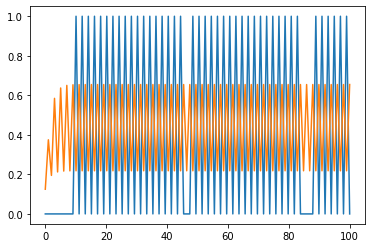

In [124]:
x = np.linspace(0,t,100)
y = markov_sim.transpose()[1]

plt.plot(x,y)

y = markov_triv_2.transpose()[1]
plt.plot(x,y)

In [ ]:
#в целом выглядит вполне хайпово

In [125]:
delta_2 = markov_triv_2 - markov_sim #ошибки для всех t

In [128]:
cov = np.cov(delta_2,delta_2)
cov

array([[ 0.35416667, -0.1875    ,  0.37745904, ..., -0.0943305 ,
         0.05188983, -0.0943305 ],
       [-0.1875    ,  0.40400662, -0.10785725, ...,  0.03293774,
        -0.08130967,  0.03293774],
       [ 0.37745904, -0.10785725,  0.4333035 , ..., -0.13816596,
         0.07200024, -0.13816596],
       ...,
       [-0.0943305 ,  0.03293774, -0.13816596, ...,  0.34992404,
        -0.33911678,  0.34992404],
       [ 0.05188983, -0.08130967,  0.07200024, ..., -0.33911678,
         0.34992404, -0.33911678],
       [-0.0943305 ,  0.03293774, -0.13816596, ...,  0.34992404,
        -0.33911678,  0.34992404]])

# 3.3 Нелинейная оценка

In [183]:
c = np.zeros((4,1))
c[0] = 1
c[1] = 2
c[2] = 3
c[3] = 3
c = c.transpose()

sigma = np.zeros((4,1))
sigma[0] = 5
sigma[1] = 6
sigma[2] = 7
sigma[3] = 8
sigma = sigma.transpose()

In [184]:
Y = np.zeros((t,len(pi0)))

for i in range(t):
    Y[i] = c.dot(markov_sim[i]) + sigma.dot(markov_sim[i])*V[i]

In [185]:
Y

array([[ 13.67463516,  13.67463516,  13.67463516,  13.67463516],
       [  6.6026332 ,   6.6026332 ,   6.6026332 ,   6.6026332 ],
       [ -2.18490794,  -2.18490794,  -2.18490794,  -2.18490794],
       [ 10.20538568,  10.20538568,  10.20538568,  10.20538568],
       [  7.78638869,   7.78638869,   7.78638869,   7.78638869],
       [ 14.47522251,  14.47522251,  14.47522251,  14.47522251],
       [  3.68300399,   3.68300399,   3.68300399,   3.68300399],
       [  0.6875903 ,   0.6875903 ,   0.6875903 ,   0.6875903 ],
       [  8.43924687,   8.43924687,   8.43924687,   8.43924687],
       [ -2.8834158 ,  -2.8834158 ,  -2.8834158 ,  -2.8834158 ],
       [  0.29158271,   0.29158271,   0.29158271,   0.29158271],
       [  2.2068694 ,   2.2068694 ,   2.2068694 ,   2.2068694 ],
       [ -3.8410467 ,  -3.8410467 ,  -3.8410467 ,  -3.8410467 ],
       [ -0.47959369,  -0.47959369,  -0.47959369,  -0.47959369],
       [  1.27087761,   1.27087761,   1.27087761,   1.27087761],
       [  4.6806562 ,   4

In [199]:
markov_nlin = np.zeros((t,len(pi0)))

for i in range(t):
    if i == 0:
        markov_nlin[i] = deepcopy(pi0)
            
    if i != 0:
        
        prognoz = deepcopy(P.transpose().dot(markov_nlin[i-1]))
        
        summa = 0
        for n in range(len(pi0)):
            summa += (prognoz[n]/sigma[0][n])*stats.norm.pdf((Y[i]-c[0][n])/sigma[0][n])[0]
            
        for j in range(len(pi0)):
            markov_nlin[i][j] = ((prognoz[j]/sigma[0][j])*stats.norm.pdf((Y[i]-c[0][j])/sigma[0][j])[0])/summa

In [200]:
markov_nlin

array([[0.375     , 0.125     , 0.375     , 0.125     ],
       [0.17838135, 0.39930415, 0.05914538, 0.36316912],
       [0.67505528, 0.16093175, 0.12264157, 0.04137141],
       [0.10029923, 0.69859905, 0.03946098, 0.16164074],
       [0.67341826, 0.12039247, 0.15890013, 0.04728914],
       [0.03396265, 0.59279272, 0.04758251, 0.32566212],
       [0.78561326, 0.03294531, 0.14556551, 0.03587592],
       [0.06729961, 0.80896726, 0.01330277, 0.11043037],
       [0.728461  , 0.08641263, 0.16704249, 0.01808388],
       [0.11293564, 0.73955878, 0.01234303, 0.13516255],
       [0.81041427, 0.09767517, 0.08403734, 0.00787322],
       [0.10987083, 0.81655343, 0.01034404, 0.0632317 ],
       [0.82197272, 0.09599515, 0.07447906, 0.00755308],
       [0.11459434, 0.82046127, 0.0096982 , 0.05524618],
       [0.82205673, 0.10027259, 0.07140694, 0.00626374],
       [0.09716435, 0.83321628, 0.01094905, 0.05867032],
       [0.84078924, 0.0824301 , 0.0698754 , 0.00690527],
       [0.05368196, 0.85546773,

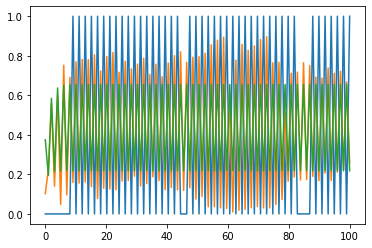

In [198]:
x = np.linspace(0,t,100)
y = markov_sim.transpose()[0]

plt.plot(x,y)

y = markov_nlin.transpose()[0]
plt.plot(x,y)

y = markov_triv_2.transpose()[0]
plt.plot(x,y)